## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [3937]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

### Data Understanding and Preparation

In [3938]:
# Load Dataset
housing_dataset = pd.read_csv("train.csv")

In [3939]:
# Find total number of rows and columns
housing_dataset.shape

(1460, 81)

Observation : There are 1460 rows and 81 columns

In [3940]:
# Preview Dataset
housing_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3941]:
# Dataset Info
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3942]:
# Find and print duplicates
print("The total number of Duplicate Rows are" , housing_dataset.duplicated().sum())

The total number of Duplicate Rows are 0


Observation : There are no duplicate records in the dataset

### Find numerical and categorical columns

In [3943]:
category_columns = housing_dataset.select_dtypes(include=['object' ,'O']).columns.tolist()
print(category_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [3944]:
numeric_columns = housing_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### Handling Null Values

In [3945]:
# Find the percentage of null values present in the dataset
round(100*housing_dataset.isnull().mean(), 2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

Observation: We could see there are at least 4 features which has more than 80% NULL values

#### Drop columns which are insignificant

In [3946]:
#Dropping PoolQC, MiscFeature, Alley, Fence
housing_dataset = housing_dataset.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'Id', 'MoSold'], axis=1)

In [3947]:
housing_dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,2008,WD,Normal,250000


In [3948]:
# Finding amount of NULL values in the dataframe
housing_dataset.isnull().sum()[housing_dataset.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [3949]:
housing_df=housing_dataset

### Imputing NAN values with Median or new category based on the business relevance 

In [3950]:
# Fill Na in Numerical columns with median value
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [3951]:
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].fillna('No_Fireplace')

In [3952]:
# Fill Na in Numerical columns with median value
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median())

In [3953]:
housing_df['BsmtQual'] = housing_df['BsmtQual'].fillna('No_Basement')

In [3954]:
housing_df['BsmtCond'] = housing_df['BsmtCond'].fillna('No_Basement')

In [3955]:
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].fillna('No_Basement')

In [3956]:
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].fillna('No_Basement')

In [3957]:
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].fillna('No_Basement')

In [3958]:
housing_df['GarageType'] = housing_df['GarageType'].fillna('No_Garage')

In [3959]:
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].fillna(0)

In [3960]:
housing_df['GarageFinish'] = housing_df['GarageFinish'].fillna('No_Garage')

In [3961]:
housing_df['GarageQual'] = housing_df['GarageQual'].fillna('No_Garage')

In [3962]:
housing_df['GarageCond'] = housing_df['GarageCond'].fillna('No_Garage')

In [3963]:
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('None')

In [3964]:
# replace null with mode, since only 1 value is missing
housing_df['Electrical'] = housing_df['Electrical'].fillna(housing_df['Electrical'].mode()[0])

In [3965]:
#check if there are any more columns with null values
housing_df.isnull().sum()[housing_df.isnull().sum()>0]

Series([], dtype: int64)

### Derive new data columns

In [3966]:
# Once new columns are derived from existing columns, we should drop original columns
columns_to_drop = []

In [3967]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
housing_df['HouseAge'] = housing_df.YrSold - housing_df.YearBuilt
#calculate the age of garage i.e. HouseAge from YrSold - YearBuilt 
housing_df['GarageAge'] = housing_df.YrSold - housing_df.GarageYrBlt
# Calculate Modified age
housing_df['HouseModifiedAge'] = housing_df.YrSold - housing_df.YearRemodAdd
columns_to_drop.extend(['YrSold', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'])

In [3968]:
# Combine OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch
housing_df['TotalPorchArea'] = housing_df.OpenPorchSF + housing_df.EnclosedPorch + housing_df['3SsnPorch'] +housing_df.ScreenPorch
columns_to_drop.extend(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

In [3969]:
#Calculate Total house built up area
housing_df['Total_sqr_footage'] = (housing_df['BsmtFinSF1'] + housing_df['BsmtFinSF2'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF'])
columns_to_drop.extend(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF'])

In [3970]:
# Calculating Total number of bathrooms
housing_df['Total_Bathrooms'] = (housing_df['FullBath'] + (0.5 * housing_df['HalfBath']) + housing_df['BsmtFullBath'] + (0.5 * housing_df['BsmtHalfBath']))
columns_to_drop.extend(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'])

In [3971]:
# Remove BsmtUnfSF as well, because we have TotalBsmtSF which is the sum of BsmtUnfSF , BsmtFinSF1 and BsmtFinSF2
columns_to_drop.append('BsmtUnfSF')

In [3972]:
# Drop the columns from dataframe
housing_df=housing_df.drop(columns_to_drop, axis=1)
housing_df.shape

(1460, 64)

### Find Relationship between Predictor and Target Variable

In [3973]:
#convert OverallQual, MSSubClass, OverallCond, into object type 
for feature in ['MSSubClass', 'OverallQual', 'OverallCond']:
    housing_df = housing_df.astype({feature:object})

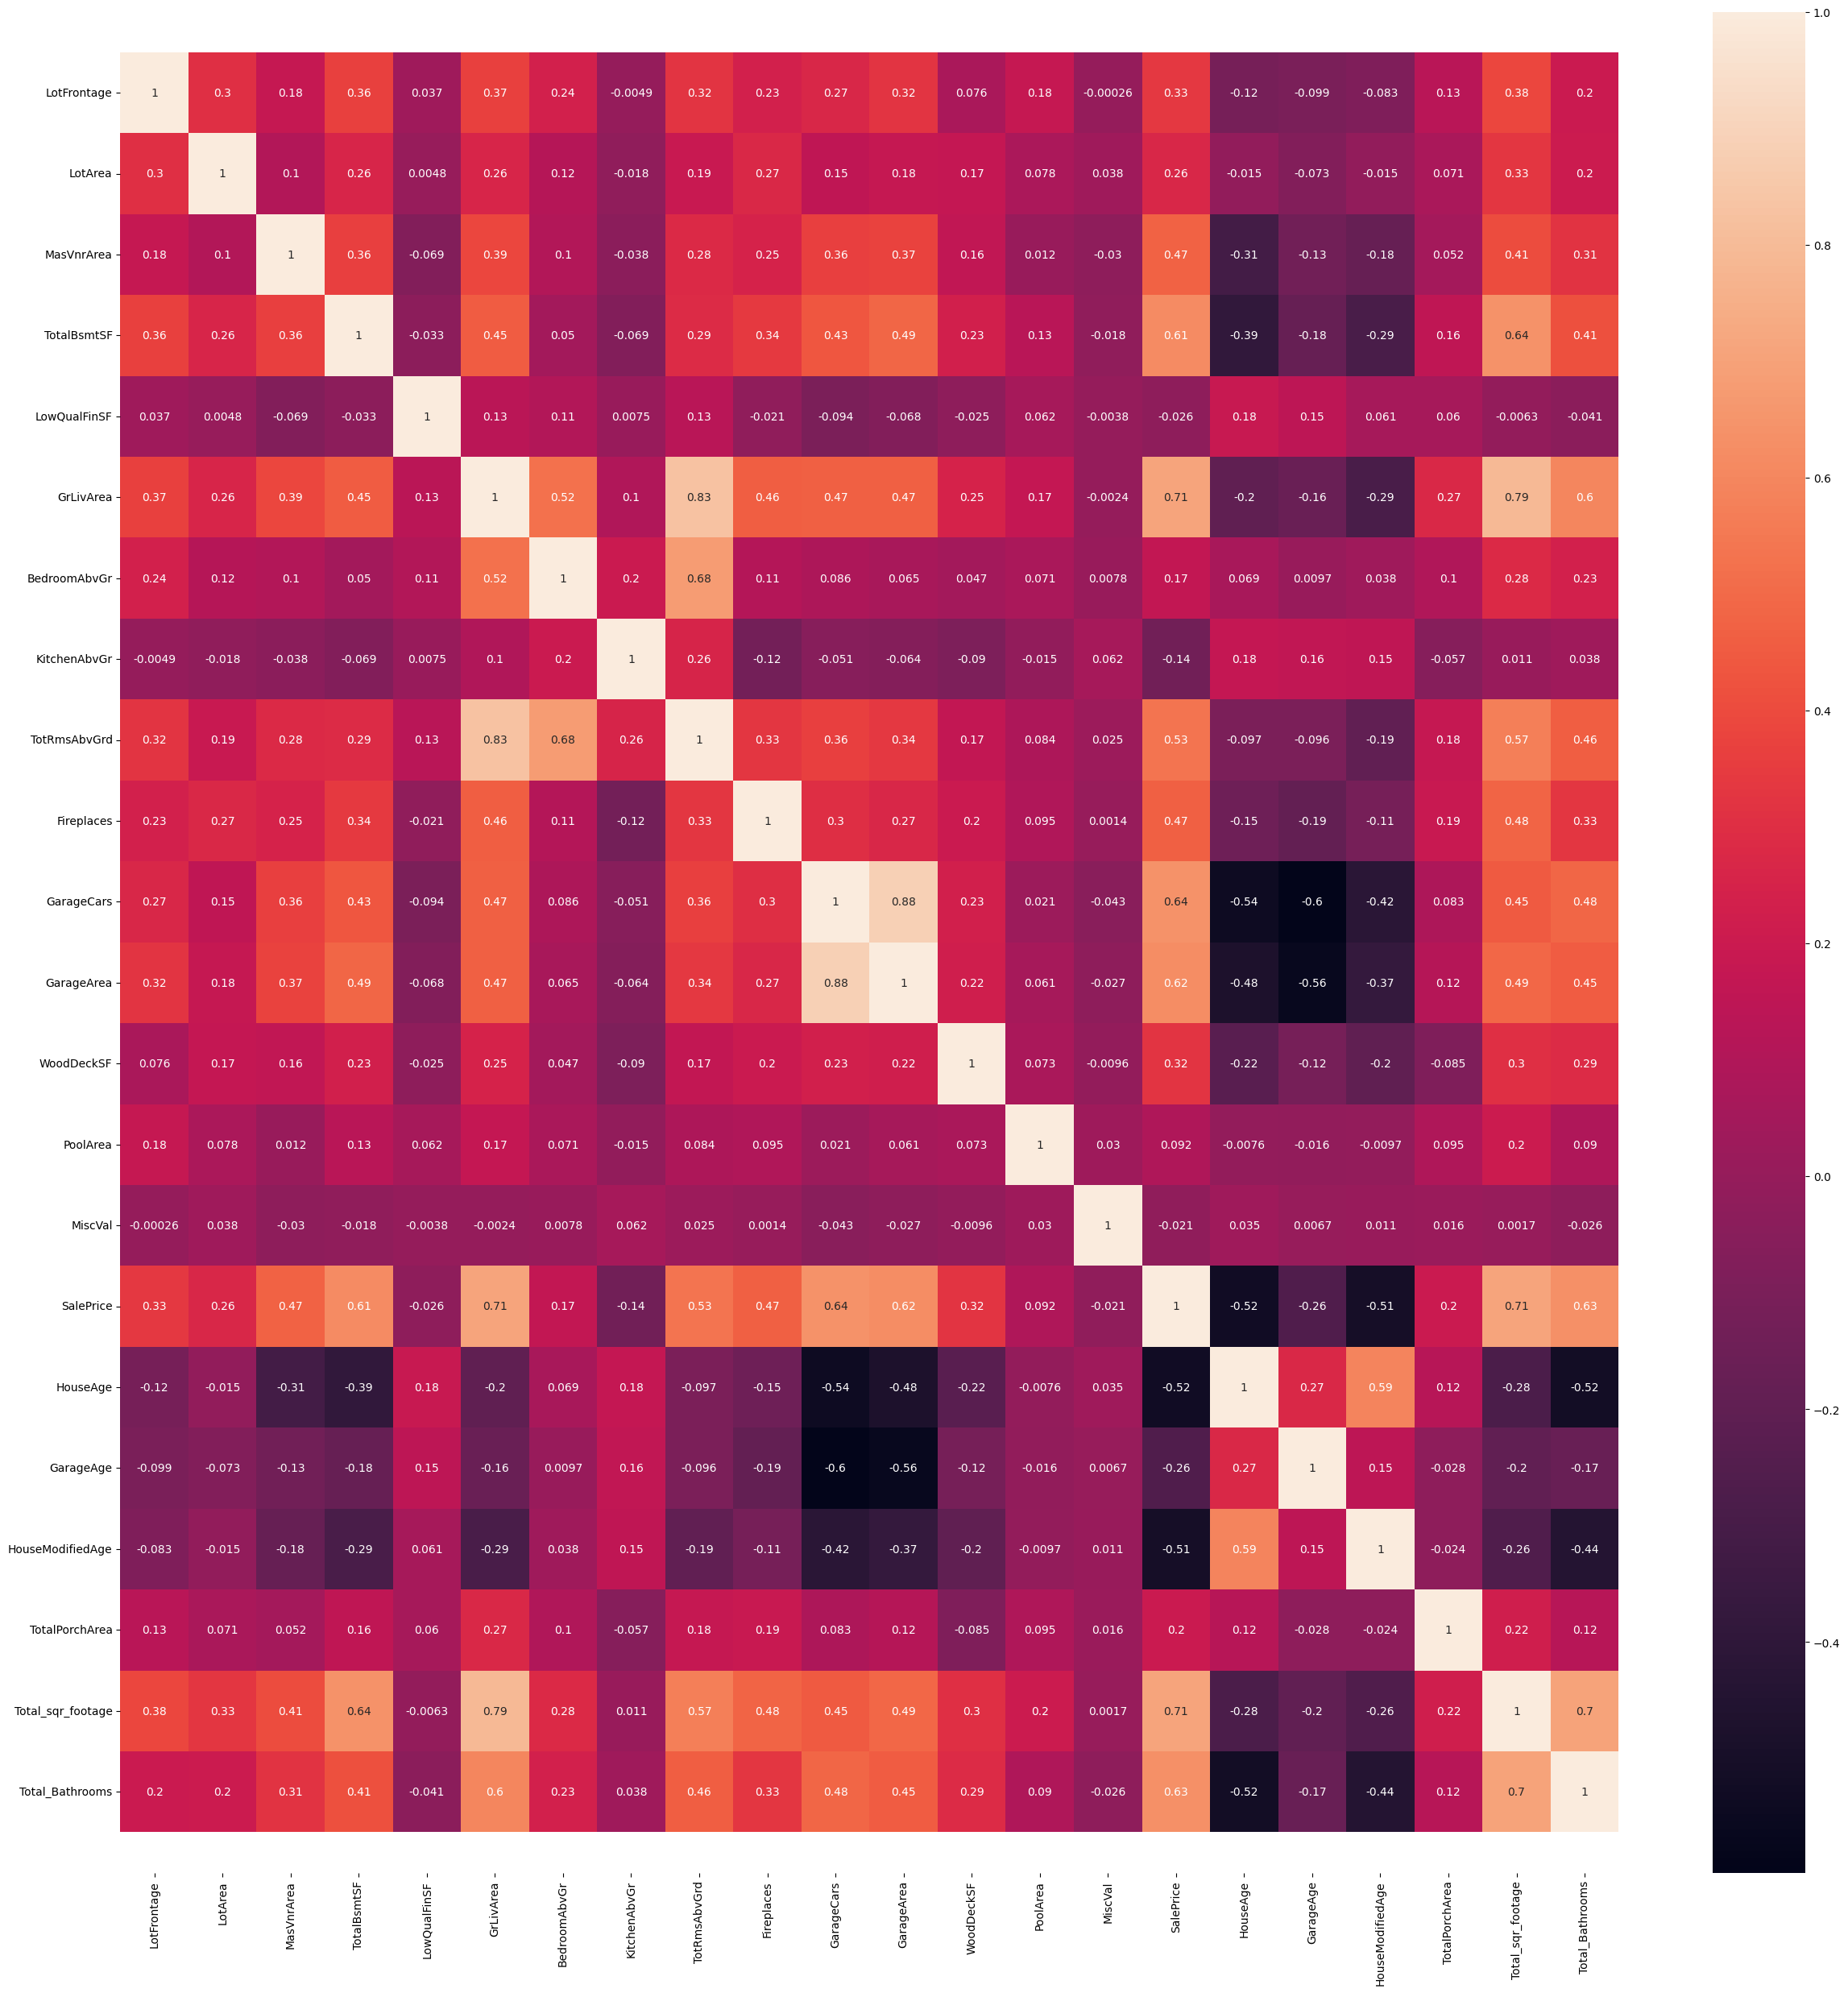

In [3974]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(housing_df.corr(), 
            xticklabels=housing_df.corr().columns.values,
            yticklabels=housing_df.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [3975]:
corr_val = housing_df[list(housing_df.dtypes[housing_df.dtypes != 'object'].index)].corr()

In [3976]:
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

GrLivArea            0.708624
Total_sqr_footage    0.708047
GarageCars           0.640409
Total_Bathrooms      0.631731
GarageArea           0.623431
TotalBsmtSF          0.613581
TotRmsAbvGrd         0.533723
Name: SalePrice, dtype: float64


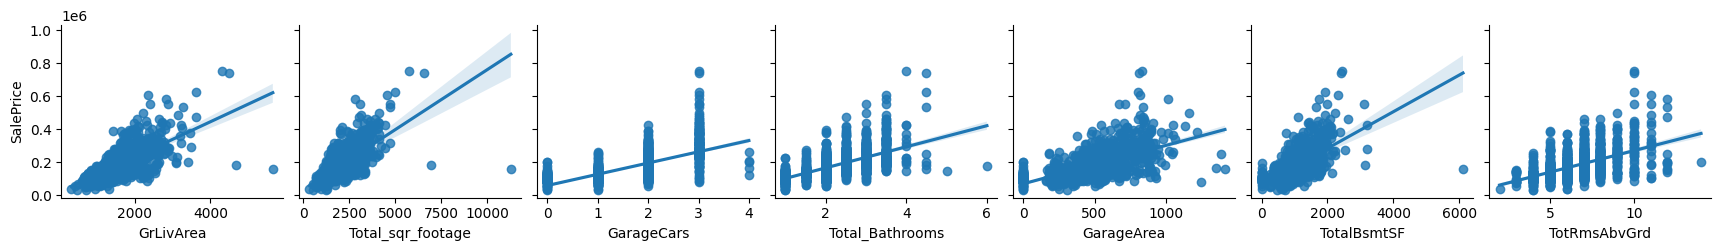

In [3977]:
# Draw Pair plot for the correlated features
sns.pairplot(housing_df, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

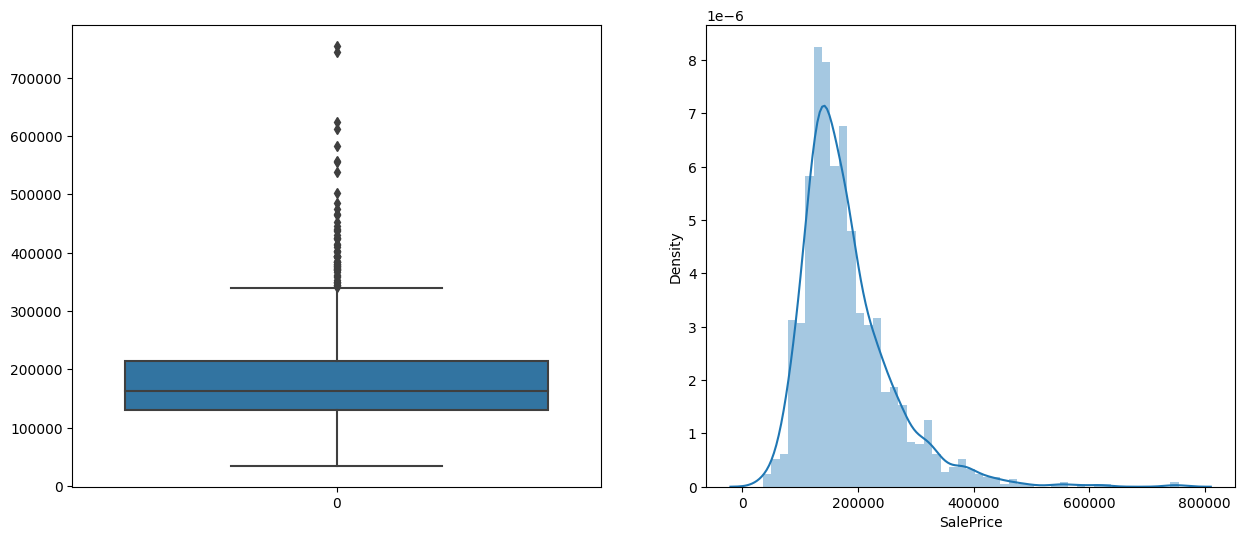

In [3978]:
# Let us check the SalePrice as well
f, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(housing_df['SalePrice'],  orient='v' , ax=axes[0])
sns.distplot(housing_df['SalePrice'], ax=axes[1])
plt.show()

In [3979]:
# We infer Sales price is right skewed from the above chart.
housing_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [3980]:
## Log transform the target variable, because SalePrice is right skewed
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])

In [3981]:
#List of Categorical Columns
categorical_columns = housing_df.select_dtypes(include=['object' ,'O']).columns.tolist()
print(categorical_columns)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


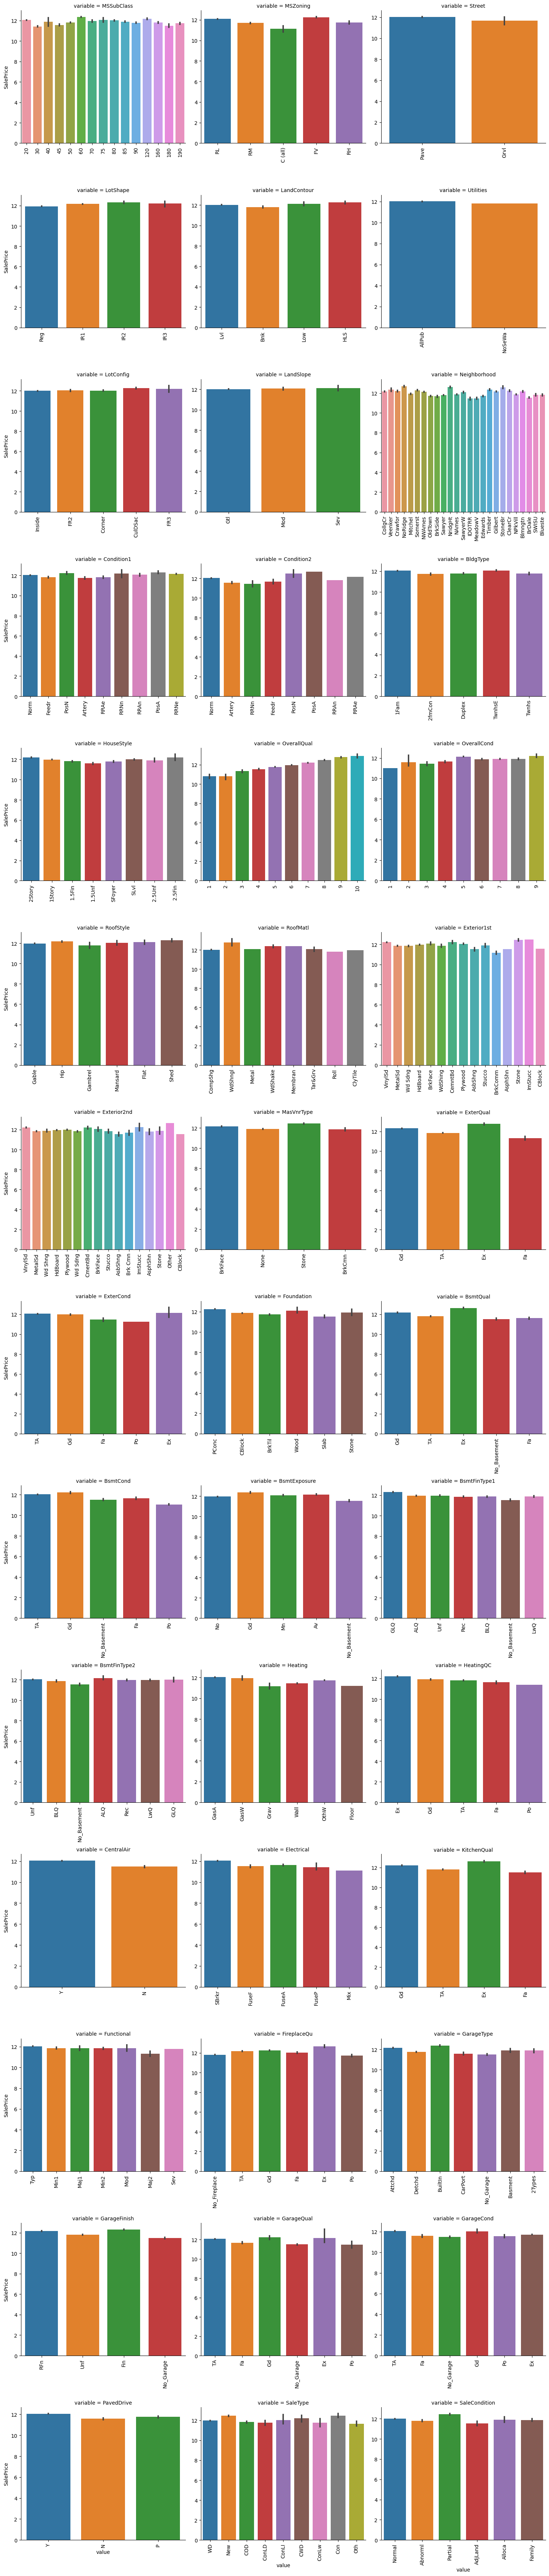

In [3982]:
def barplot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(housing_df, id_vars=['SalePrice'], value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable",col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(barplot, "value", "SalePrice")

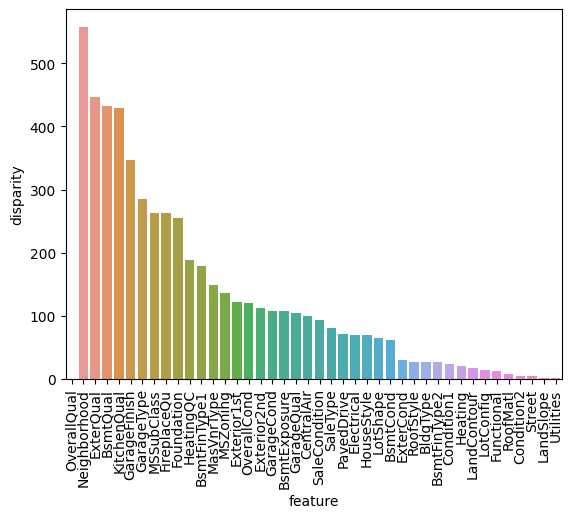

In [3983]:
def create_chart_with_sales(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_columns
    pvals = []
    for category in categorical_columns:
        samples = []
        for cls in frame[category].unique():
            s = frame[frame[category] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = create_chart_with_sales(housing_df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

From the above chart we can see that some of the majorly influencing variables are -
- OverallQuality
- Neigbhourhood
- External Quality
- Basement Quality
- KitchenQuality

In [3984]:
# We can also drop least contributing variables, may be last 5 columns from teh above chart
housing_df= housing_df.drop(['Utilities','RoofMatl','Condition2','Street','LandSlope'], axis=1)

### Creating dummy variable for categorical variable

In [3985]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,HouseModifiedAge,TotalPorchArea,Total_sqr_footage,Total_Bathrooms
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,0,WD,Normal,12.247694,5,5.0,5,61,2416,3.5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,0,WD,Normal,12.109011,31,31.0,31,0,2240,2.5
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,0,WD,Normal,12.317167,7,7.0,6,42,2272,3.5
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,0,WD,Abnorml,11.849398,91,8.0,36,307,1933,2.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,0,WD,Normal,12.429216,8,8.0,8,84,2853,3.5


In [3986]:
housing_categorical = housing_df.select_dtypes('object')
housing_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,...,Gd,Typ,No_Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [3987]:
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [3988]:
housing_df = housing_df.drop(list(housing_categorical.columns),axis=1)

In [3989]:
housing_df = pd.concat([housing_df, housing_dummies], axis=1)

In [3990]:
housing_df.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,856,0,1710,3,1,8,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,1262,0,1262,3,1,6,1,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,920,0,1786,3,1,6,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,756,0,1717,3,1,7,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,1145,0,2198,4,1,9,1,...,0,0,0,0,1,0,0,0,1,0


In [3991]:
#Split the data into train and test
y = housing_df.pop('SalePrice')
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Test Train Split

In [3992]:
X = housing_df
X.shape

(1460, 244)

In [3993]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.70,random_state=100)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (1021, 244)
X_test shape (439, 244)
y_train shape (1021,)
y_test shape (439,)


### Scaling the continous variables

In [3994]:
numerical_columns = [f for f in housing_df.columns if housing_df.dtypes[f] == 'int64' or housing_df.dtypes[f] == 'float64']

In [3995]:
print(numerical_columns)

['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 'HouseAge', 'GarageAge', 'HouseModifiedAge', 'TotalPorchArea', 'Total_sqr_footage', 'Total_Bathrooms']


In [3996]:
# Using standard scaler for normalization as we observed few outliers in the data
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

## Linear Regression

Let's now try predicting House prices, a dataset using linear regression techniques.

In [3997]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

In [3998]:
#Find the top 75 features
rfe = RFE(lm, n_features_to_select=70)
rfe = rfe.fit(X_train, y_train)

In [3999]:
col=X_train.columns[rfe.support_]
col

Index(['GrLivArea', 'HouseAge', 'MSSubClass_90', 'MSSubClass_160',
       'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'BldgType_2fmCon', 'BldgType_Duplex', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Exterior2nd_Stucco', 'ExterCond_Po',
       'BsmtQual_No_Basement', 'BsmtCond_No_Basement'

In [4000]:
rfe_supported_columns = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfe_supported_columns]
X_test_rfe =  X_test[rfe_supported_columns]

In [4001]:
lm=lm.fit(X_train_rfe, y_train)

In [4002]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-549725188328.82434
[ 1.48694622e-01 -1.14783766e-01  1.02037145e+12 -2.28949448e-01
 -2.23739020e-01 -1.36626559e+12  4.52217761e-01  4.61609776e-01
  4.76497265e-01  3.97357072e-01  9.69444855e-02  1.76494147e-01
  1.02322695e-01  1.32961118e-01  1.77829501e-01  1.15397450e-01
  1.56014284e-01  1.35438385e-01  1.36626559e+12 -1.02037145e+12
 -1.41596500e+11 -1.41596500e+11 -1.41596500e+11 -1.41596500e+11
 -1.41596500e+11 -1.41596500e+11 -1.41596500e+11 -1.41596500e+11
 -1.41596500e+11  6.91321689e+11  6.91321689e+11  6.91321689e+11
  6.91321689e+11  6.91321689e+11  6.91321689e+11  6.91321689e+11
  6.91321689e+11 -9.07606578e+10 -4.29321289e-01  1.29673004e-01
 -8.18809692e+10  9.07606578e+10  8.18809692e+10 -9.66833628e+08
 -1.05651855e-01  9.71200055e+07  8.87361761e+11  6.57153412e+11
  5.49725188e+11  1.18347168e-01 -1.54451517e+12  9.59472656e-02
  2.42797852e-01 -1.93084717e-01 -1.83319092e-01 -4.51416016e-01
  3.94122454e+11  1.14228674e+12  3.83389083e+11  3.83389083e+11
 -1.0

In [4003]:
def get_model_metrics(X_train, X_test, y_pred_train, y_pred_test):
    """
    """
    metric = []
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2-training : ", r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2-test : ",r2_test_lr)
    metric.append(r2_test_lr)

    rss_train_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS-training : ", rss_train_lr)
    metric.append(rss_train_lr)

    rss_test_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS-test : ",rss_test_lr)
    metric.append(rss_test_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE-training : ", mse_train_lr)
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE-test : ",mse_test_lr)
    metric.append(mse_test_lr**0.5)

    return metric

In [4004]:
def get_top_predictors(coefficients, X_train):
    coeff_df = pd.DataFrame(np.atleast_2d(coefficients),columns=X_train.columns)
    coeff_df = coeff_df.T
    coeff_df.rename(columns={0: 'Co-Efficient'},inplace=True)
    coeff_df.sort_values(by=['Co-Efficient'], ascending=False,inplace=True)
    total_predictors = (coeff_df['Co-Efficient'] != 0).sum()
    print("There are {0} Predictors in this model. Top 10 features are shown below".format(total_predictors))
    return coeff_df.head(20)

In [4005]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)
linear_mteric = get_model_metrics(X_train, X_test, y_pred_train, y_pred_test)

R2-training :  0.8869513534007961
R2-test :  -7.810819173793284e+22
RSS-training :  18.138021947696394
RSS-test :  5.651415622312609e+24
MSE-training :  0.017764957833199212
MSE-test :  1.2873384105495694e+22


## Ridge and Lasso Regression

Let's now try predicting House prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [4006]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [4007]:
#Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1.0}


In [4008]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.1535967  -0.12058358 -0.03131059 -0.21907025 -0.17769968 -0.00399335
  0.24518094  0.2849793   0.30154353  0.22430029  0.0913867   0.14362425
  0.0981002   0.12689745  0.18562064  0.11645785  0.14730721  0.1521174
 -0.00399335 -0.03131059 -0.32631375 -0.077171   -0.10058255 -0.04864205
  0.01003942  0.09608677  0.21215255  0.36255897  0.18249914  0.06338026
 -0.16601403 -0.03694191 -0.01510215  0.0526444   0.09087153  0.12822886
  0.19356053 -0.02075632 -0.22890248  0.1257656  -0.03599715 -0.02075632
 -0.03599715  0.         -0.08732502  0.         -0.05171294 -0.05171294
 -0.3106275   0.12422844 -0.05171294  0.07714693  0.18117947 -0.09859747
 -0.10829207 -0.21126926 -0.02073868 -0.02073868 -0.04159083  0.11024985
 -0.02073868 -0.05753074  0.00504725 -0.01712949 -0.00984039 -0.02073868
  0.0114838   0.03166159  0.0150283   0.0150283 ]


In [4009]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)
ridge_mteric = get_model_metrics(X_train_rfe, X_test_rfe, y_pred_train, y_pred_test)

R2-training :  0.8845317725560948
R2-test :  0.8547878841065055
RSS-training :  18.526230137583077
RSS-test :  10.50663191721308
MSE-training :  0.018145181329660212
MSE-test :  0.023933102317114076


### Get top 10 predictors for Ridge regression

In [4010]:
get_top_predictors(ridge.coef_, X_train_rfe)

There are 68 Predictors in this model. Top 10 features are shown below


,Co-Efficient
OverallQual_9,0.362559
MSZoning_RL,0.301544
MSZoning_RH,0.284979
MSZoning_FV,0.245181
MSZoning_RM,0.224300
OverallQual_8,0.212153
OverallCond_9,0.193561
Neighborhood_Crawfor,0.185621
OverallQual_10,0.182499
Heating_GasW,0.181179


In [4011]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [4012]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [4013]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train)
print(lasso.coef_)

[ 1.50785678e-01 -1.17943570e-01 -5.62172771e-02 -2.23197335e-01
 -1.91599086e-01 -6.96154272e-03  3.53722055e-01  3.91059811e-01
  3.97898118e-01  3.19171820e-01  8.69032904e-02  1.54967311e-01
  9.67823479e-02  1.22566286e-01  1.87992987e-01  1.16448689e-01
  1.43544666e-01  1.44130996e-01 -4.73580069e-05 -6.84571966e-03
 -4.19781619e-01 -8.17470825e-02 -1.13651165e-01 -6.10780029e-02
  5.51646897e-05  8.82032737e-02  2.08912009e-01  3.70370427e-01
  1.91476995e-01  1.69378292e-02 -1.99368842e-01 -8.63486951e-02
 -6.74405901e-02  0.00000000e+00  3.55949356e-02  7.34894496e-02
  1.45469677e-01 -0.00000000e+00 -3.29300118e-01  1.23801305e-01
 -8.45886850e-03 -0.00000000e+00 -1.25022541e-15  0.00000000e+00
 -9.96954074e-02  0.00000000e+00 -1.51984990e-01 -0.00000000e+00
 -6.07142668e-01  1.23547234e-01 -1.51680622e-03  9.13408894e-02
  2.18746226e-01 -9.78294973e-02 -1.24500731e-01 -3.16985734e-01
 -3.00518391e-02 -0.00000000e+00 -0.00000000e+00  1.48232046e-01
 -2.76139776e-08 -0.00000

In [4014]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)
lasso_metric = get_model_metrics(X_train_rfe, X_test_rfe, y_pred_train, y_pred_test)

R2-training :  0.8867742312257118
R2-test :  0.8513767729775304
RSS-training :  18.166440208292585
RSS-test :  10.75343838264008
MSE-training :  0.01779279158500743
MSE-test :  0.024495303832893122


### Get top 10 predictors for Lasso regression

In [4015]:
get_top_predictors(lasso.coef_, X_train_rfe)

There are 58 Predictors in this model. Top 10 features are shown below


,Co-Efficient
MSZoning_RL,0.397898
MSZoning_RH,0.391060
OverallQual_9,0.370370
MSZoning_FV,0.353722
MSZoning_RM,0.319172
Heating_GasW,0.218746
OverallQual_8,0.208912
OverallQual_10,0.191477
Neighborhood_Crawfor,0.187993
LandContour_Low,0.154967


In [4016]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': linear_mteric
        }
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_mteric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.869514e-01,0.884532,0.886774
1,R2 Score (Test),-7.810819e+22,0.854788,0.851377
2,RSS (Train),1.813802e+01,18.526230,18.166440
3,RSS (Test),5.651416e+24,10.506632,10.753438
4,MSE (Train),1.332852e-01,0.134704,0.133390
5,MSE (Test),1.134609e+11,0.154703,0.156510


## Conclusion

The optimal value of LAMBDA we got in case of Ridge and Lasso is :
- Ridge - **1.0**
- Lasso - **0.0001**

The r2 value we got in case of Ridge and Lasso is:
- Ridge - Train = **0.880** , Test = **0.854**
- Lasso - Train = **0.886** , Test = **0.851**

The Mean Squared error in case of Ridge and Lasso is:
- Ridge -Train **0.0181**, Test=**0.0239**
- Lasso -Train **0.0177**, Test=**0.0244**

- We can clearly observe that the Mean Squared Error of Lasso is slightly lower than that of Ridge.
- Also difference in r2 scores of test and train data is not high , hence Lasso has better edge over Ridge model.
- Additionaly number of predictors in Lasso is less compared to Ridge , hence model is simple , robust and efficient.

The Top predictors which influence the House sale price are :
- OverallQuality
- MSZoning
- GrLivArea
- Neighborhood
- GarageQual
- Heating_Gas
- LandContour